In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

**2) Trabajando con el dataset de diagnóstico de Cancer de Mama del Hospital de Winsconsin**

**a.- Averigue de que forma puede identificar la importancia (cantidad de información) que tiene cada feature.**

RTA: En el modelo DecisionTreeClassifier se puede identificar la importancia de los atributos a traves del feature_importances.
En cuanto a PCA se puede identificar por medio de las covarianzas (para saber que atributos son similares en cantidad de informacion explicada y asi descartarlos) y tambien la importancia de los principales features a travez de la variaza explicada por cada uno de ellos. Este ultimo se puede acceder a travez de el atributo de PCA explained_variance_ (varianza numerica) o explained_variance_ratio_ (varianza porcentual) 

**b.- Realice un gráfico de sedimentación o método del codo. ¿Qué cantidad de componentes le parece más apropiada para aplicar PCA?**

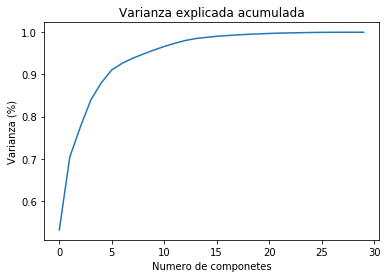

In [72]:
cancer = load_breast_cancer()
X=cancer.data
scaler = MinMaxScaler()
xScaled=scaler.fit_transform(X)
pca = PCA().fit(xScaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componetes')
plt.ylabel('Varianza (%)')
plt.title('Varianza explicada acumulada')
plt.show()

RTA: La cantidad de componentes apropiada para aplicar PCA parece ser 5  ya que con ellas se obtiene un porcentaje de  varianza explicada del 93% y de ahi en mas con no se observan crecimientos importantes al seguir agregando componentes.

**c.- Aplique PCA al dataset, entrene y pruebe con el mismo clasificador y proporción de datos. Luego verifique que medidas de performance se obtuvieron. ¿Qué puede decir acerca de la aplicación de PCA en este problema?¿Hubo una mejora?¿Porque? Analice los resultados**

In [0]:
print("Keys of cancer: {}".format(cancer.keys()))

Keys of cancer: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
X=cancer.data
pca = PCA(n_components=5)
pca.fit(xScaled)
xPca = pca.transform(xScaled)
xTrain, xTest, yTrain, yTest = train_test_split(xPca,cancer.target,stratify=cancer.target,test_size=0.37)

In [86]:
def build_tree(profundidad=None):
    tree = DecisionTreeClassifier(max_depth=profundidad,random_state=0)
    tree.fit(xTrain, yTrain)
    print("Profundidad: {0}".format(profundidad))
    print("Training Accuracy: {0:.4f}".format(tree.score(xTrain, yTrain)))
    print("Testing Accuracy: {0:.4f}".format(tree.score(xTest, yTest)))
    return tree

tree=build_tree(4)

Profundidad: 4
Training Accuracy: 0.9860
Testing Accuracy: 0.9479


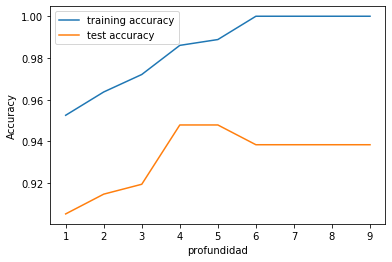

In [87]:
training_accuracy = []
test_accuracy = []
# probar profundidades de 1 a 10
profundidades_settings = range(1, 10)
for n_prof in profundidades_settings:
  # build the model
  clf = DecisionTreeClassifier(max_depth=n_prof, random_state=0)
  clf.fit(xTrain, yTrain)
  # record training set accuracy
  training_accuracy.append(clf.score(xTrain, yTrain))
  # record generalization accuracy
  test_accuracy.append(clf.score(xTest, yTest))
plt.plot(profundidades_settings, training_accuracy, label="training accuracy")
plt.plot(profundidades_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("profundidad")
plt.legend()

RTA: Se puede notar una mejora en el score del modelo al aplicar PCA n_components=5. Se puede notar claramente que al reducir los features, se simplifica con ello la estructura del arbol de decision, por lo tanto se evitan confusiones y analisis inecesarios de features en el modelo entrenado. Por ello se logra una mejor performace y scoring a la hora de predecir resultados.